In [ ]:
pip install xgboost scikit-learn numpy

In [ ]:
!pip install neattext

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import neattext.functions as nfx
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
import joblib

In [ ]:
df = pd.read_csv("emotion_dataset.csv")
df.head()

,SL. No,text,Emotion
0,0,i seriously hate one subject to death but now ...,hate
1,1,im so full of life i feel appalled,neutral
2,2,i sit here to write i start to dig out my feel...,neutral
3,3,ive been really angry with r and i feel like a...,anger
4,4,i feel suspicious if there is no one outside l...,neutral


In [ ]:
print(df.columns)

Index(['SL. No', 'text', 'Emotion'], dtype='object')


In [ ]:
df['clean_text'] = df['text'].astype(str)
df['clean_text'] = df['clean_text'].apply(nfx.remove_stopwords)
df['clean_text'] = df['clean_text'].apply(nfx.remove_punctuations)

In [ ]:
X = df['clean_text']
y = df['Emotion']

In [ ]:
vectorizer = TfidfVectorizer()
X_vec = vectorizer.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)


In [ ]:
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [ ]:
import xgboost as xgb


model = xgb.XGBClassifier(
    n_estimators=100,
    learning_rate=0.05,
    max_depth=5,
    random_state=42,
    use_label_encoder=False,
    eval_metric='mlogloss'
)


model.fit(X_train_tfidf, y_train_encoded)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:33:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
y_pred_encoded = model.predict(X_test_tfidf)
y_pred = le.inverse_transform(y_pred_encoded)

y_pred_encoded = model.predict(X_test_tfidf)

y_pred = le.inverse_transform(y_pred_encoded)

accuracy = accuracy_score(y_test, y_pred)
print(f"Recognition Accuracy: {accuracy * 100:.2f}%")

Recognition Accuracy: 97.64%



Classification Report:
              precision    recall  f1-score   support

       anger       0.97      0.80      0.88      2489
     boredom       0.94      0.76      0.84        21
       empty       1.00      0.32      0.48      1096
  enthusiasm       1.00      0.98      0.99      1839
         fun       0.98      0.88      0.93      1977
   happiness       0.98      0.96      0.97      5370
        hate       0.99      0.82      0.90      3018
        love       0.99      0.96      0.98      8001
     neutral       0.97      1.00      0.99    134999
      relief       0.98      0.71      0.82      3396
     sadness       0.99      0.93      0.96      3428
    surprise       0.99      0.97      0.98      1372
       worry       1.00      0.94      0.97       905

    accuracy                           0.98    167911
   macro avg       0.98      0.85      0.90    167911
weighted avg       0.98      0.98      0.97    167911



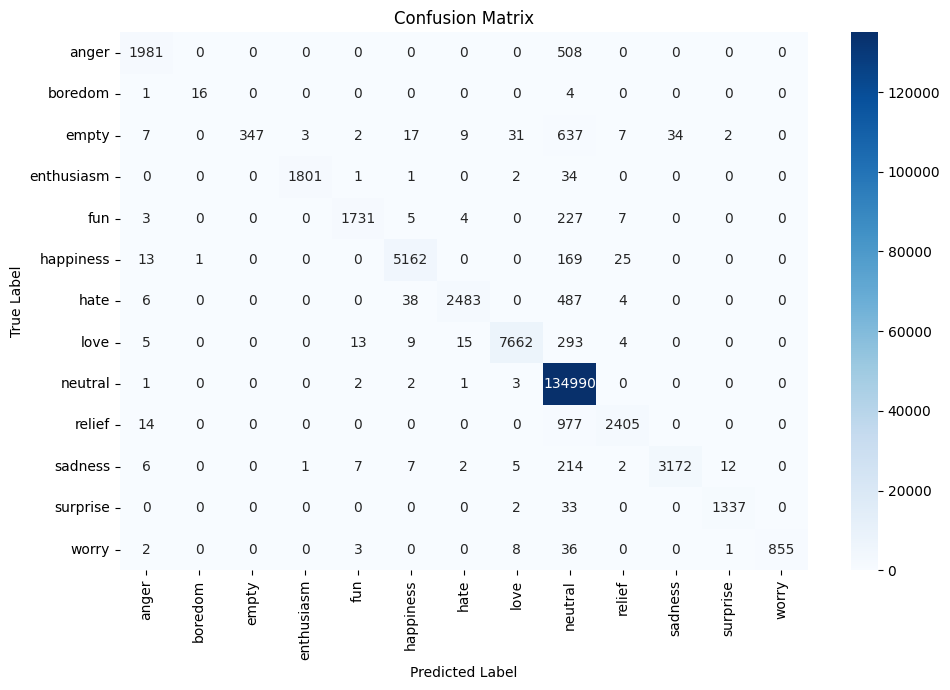

In [ ]:
present_labels = np.unique(y_test)
present_labels_encoded = le.transform(present_labels)

print("\nClassification Report:")
print(classification_report(
    y_test, y_pred,
    labels=present_labels,
    target_names=present_labels
))


cm = confusion_matrix(
    y_test, y_pred,
    labels=present_labels
)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=present_labels,
            yticklabels=present_labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

In [ ]:
joblib.dump(model, "emotion_model.pkl")
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")
print("✅ Model and vectorizer saved successfully.")

✅ Model and vectorizer saved successfully.


In [ ]:
model = joblib.load("emotion_model.pkl")
vectorizer = joblib.load("tfidf_vectorizer.pkl")

def predict_emotion(text):
    clean = nfx.remove_stopwords(text)
    clean = nfx.remove_punctuations(clean)
    vec = vectorizer.transform([clean])
    pred_encoded = model.predict(vec)
    pred_label = le.inverse_transform(pred_encoded)
    return pred_label[0]

while True:
    user_input = input("Enter a sentence (or type 'exit'): ")
    if user_input.lower() == 'exit':
        break
    emotion = predict_emotion(user_input)
    print("Predicted Emotion:", emotion)

Enter a sentence (or type 'exit'): I am happy now
Predicted Emotion: happiness
Enter a sentence (or type 'exit'): She hate Rahul
Predicted Emotion: hate
Enter a sentence (or type 'exit'): I went to the store and bought some groceries.
Predicted Emotion: neutral
Enter a sentence (or type 'exit'): He was not just angry — he was absolutely furious when he saw the damage to his car.
Predicted Emotion: anger
Enter a sentence (or type 'exit'): i feel like she has taken on the role of a grandmother to me since my beloved grandma is no longer with me
Predicted Emotion: love
Enter a sentence (or type 'exit'): She felt sad after saying goodbye to her best friend who was moving away.
Predicted Emotion: sadness
Enter a sentence (or type 'exit'): I'm so excited! I finally got the job I wanted!
Predicted Emotion: enthusiasm
Enter a sentence (or type 'exit'): exit
